In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [15]:
# --- Load and preprocess data ---
def flatten_columns(df):
    # Join MultiIndex tuples into single strings like 'Close_TSLA'
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    return df

def preprocess(df):
    df = flatten_columns(df)
    df = df.asfreq('B').ffill()
    # use flattened column names, e.g. 'Adj Close' may be 'Adj_Close_TSLA' or just 'Close_TSLA' if Adj Close is missing
    # Since your example shows only Close, High, Low, Open, Volume - no Adj Close, use 'Close_TSLA'
    close_col = next((c for c in df.columns if c.startswith('Close')), None)
    if close_col is None:
        raise ValueError("No Close price column found after flattening")
    df['ret'] = df[close_col].pct_change()
    df['log_ret'] = np.log(df[close_col] / df[close_col].shift(1))
    df['vol_20'] = df['log_ret'].rolling(20).std() * (252 ** 0.5)
    return df




In [16]:
data_dir = '../../data/raw'
assets = ['TSLA', 'BND', 'SPY']
data = {}

In [17]:
# Usage example
df = pd.read_parquet(f"{data_dir}/{asset}.parquet")
df.index = pd.to_datetime(df.index)
processed_df = preprocess(df)

In [21]:
processed_df.head()

,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,ret,log_ret,vol_20
Date,,,,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000.0,NaN,NaN,NaN
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500.0,0.040386,0.039592,NaN
2015-07-03,18.667999,18.830000,18.220667,18.680000,107458500.0,0.000000,0.000000,NaN
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500.0,-0.001071,-0.001072,NaN
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500.0,-0.042328,-0.043250,NaN


## Summary statistics and info

In [ ]:

print("Dataframe Info:")
processed_df.info()

print("\nSummary Statistics:")
display(processed_df.describe())

print("\nMissing Values Count:")
print(processed_df.isna().sum())

print("\nDuplicate Rows Count:")
print(processed_df.duplicated().sum())

print("\nData Preview (first 5 rows):")
display(processed_df.head())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2631 entries, 2015-07-01 to 2025-07-30
Freq: B
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_TSLA   2631 non-null   float64
 1   High_TSLA    2631 non-null   float64
 2   Low_TSLA     2631 non-null   float64
 3   Open_TSLA    2631 non-null   float64
 4   Volume_TSLA  2631 non-null   float64
 5   ret          2630 non-null   float64
 6   log_ret      2630 non-null   float64
 7   vol_20       2611 non-null   float64
dtypes: float64(8)
memory usage: 185.0 KB

Summary Statistics:


,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,ret,log_ret,vol_20
count,2631.000000,2631.000000,2631.000000,2631.000000,2.631000e+03,2630.000000,2630.000000,2611.000000
mean,132.320009,135.307819,129.183352,132.331943,1.139845e+08,0.001761,0.001094,0.534173
std,121.280388,124.140665,118.348093,121.366455,7.288973e+07,0.036600,0.036492,0.220106
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07,-0.210628,-0.236518,0.163360
25%,18.989667,19.327000,18.605333,18.924334,6.908220e+07,-0.016382,-0.016518,0.370104
50%,95.384003,99.983330,92.389336,95.666664,9.510450e+07,0.000000,0.000000,0.497063
75%,236.991661,241.291664,232.334999,236.121666,1.322551e+08,0.018971,0.018793,0.640327
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08,0.226900,0.204491,1.614869



Missing Values Count:
Close_TSLA      0
High_TSLA       0
Low_TSLA        0
Open_TSLA       0
Volume_TSLA     0
ret             1
log_ret         1
vol_20         20
dtype: int64

Duplicate Rows Count:
0

Data Preview (first 5 rows):


,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,ret,log_ret,vol_20
Date,,,,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000.0,NaN,NaN,NaN
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500.0,0.040386,0.039592,NaN
2015-07-03,18.667999,18.830000,18.220667,18.680000,107458500.0,0.000000,0.000000,NaN
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500.0,-0.001071,-0.001072,NaN
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500.0,-0.042328,-0.043250,NaN


### Visualize Closing Prices over time

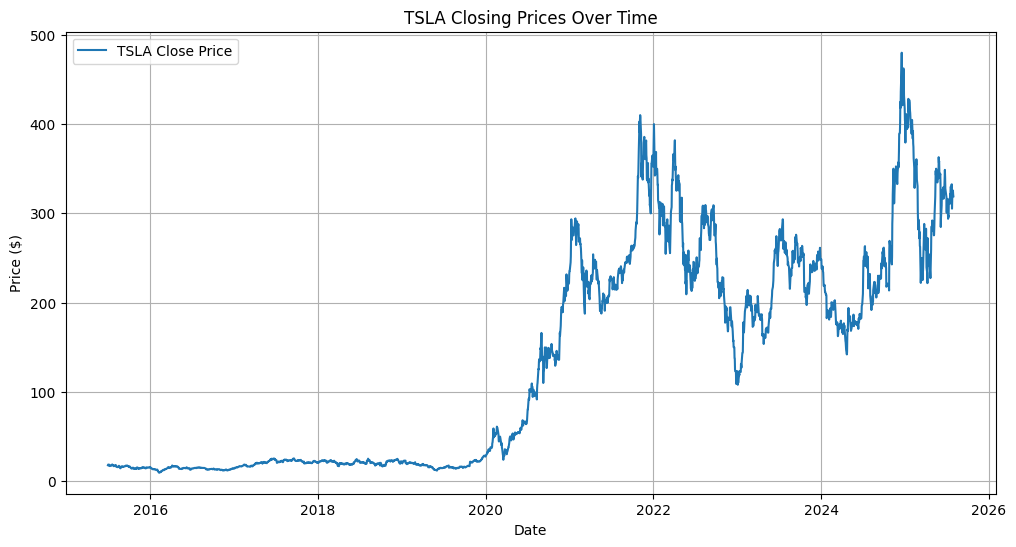

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(processed_df.index, processed_df['Close_TSLA'], label='TSLA Close Price')
plt.title('TSLA Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


### Calculate and plot daily returns and log returns

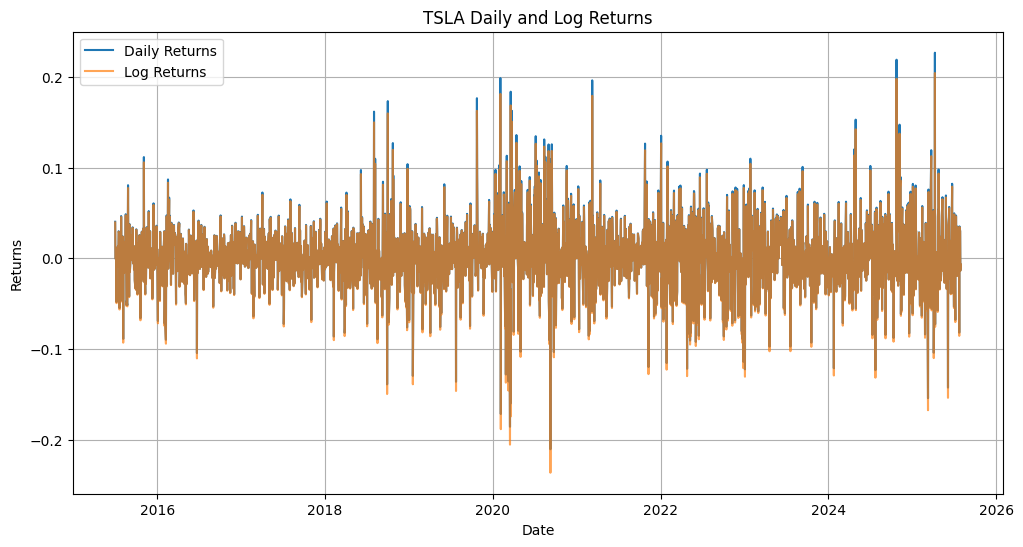

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(processed_df.index, processed_df['ret'], label='Daily Returns')
plt.plot(processed_df.index, processed_df['log_ret'], label='Log Returns', alpha=0.7)
plt.title('TSLA Daily and Log Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


### Plot rolling volatility (20-day window, annualized)

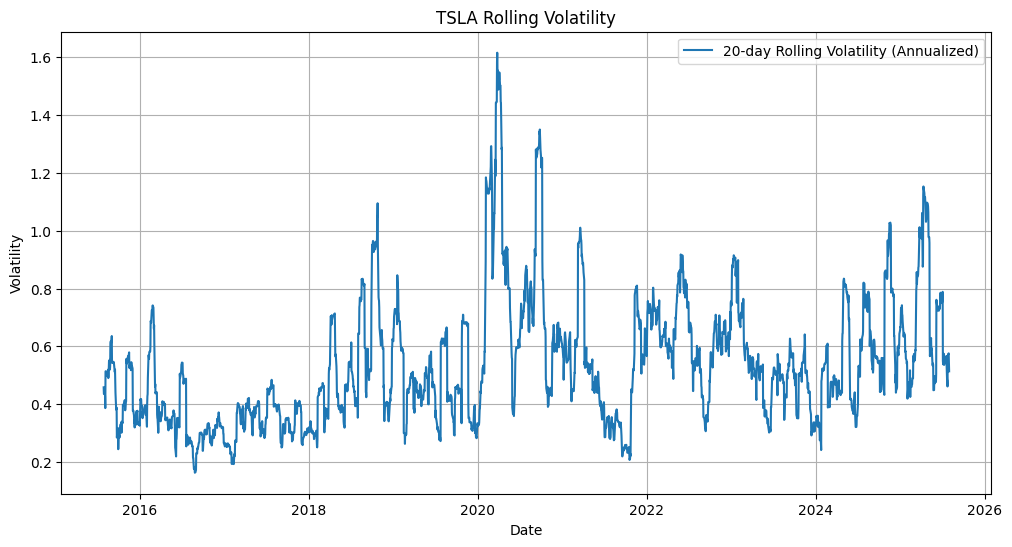

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(processed_df.index, processed_df['vol_20'], label='20-day Rolling Volatility (Annualized)')
plt.title('TSLA Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


### Volatility and Risk Insights

- The 5% Value at Risk (VaR) indicates that on 5% of trading days, losses exceed approximately {var_5:.4f} (negative return).
- Rolling volatility fluctuates significantly, with periods of increased market uncertainty (e.g., around 2020).
- The stock price shows significant fluctuations in daily returns, reflecting TSLA's high-growth and high-risk nature.

### Check for missing values and handle if any (forward fill)

In [ ]:

missing_count = processed_df.isna().sum()
print("Missing values before fill:")
print(missing_count)

processed_df.fillna(method='ffill', inplace=True)

print("Missing values after forward fill:")
print(processed_df.isna().sum())


Missing values before fill:
Close_TSLA      0
High_TSLA       0
Low_TSLA        0
Open_TSLA       0
Volume_TSLA     0
ret             1
log_ret         1
vol_20         20
dtype: int64
Missing values after forward fill:
Close_TSLA      0
High_TSLA       0
Low_TSLA        0
Open_TSLA       0
Volume_TSLA     0
ret             1
log_ret         1
vol_20         20
dtype: int64


/tmp/ipykernel_57938/3467627745.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  processed_df.fillna(method='ffill', inplace=True)


### Stationarity testing (ADF test) on Close prices and returns

In [ ]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series, name):
    print(f"ADF Test for {name}:")
    result = adfuller(series.dropna())
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.4f}")
    if result[1] < 0.05:
        print(f"Result: {name} is likely stationary (reject H0)")
    else:
        print(f"Result: {name} is likely non-stationary (fail to reject H0)")
    print()

adf_test(processed_df['Close_TSLA'], 'TSLA Close Price')
adf_test(processed_df['ret'], 'TSLA Daily Returns')


ADF Test for TSLA Close Price:
  ADF Statistic: -1.4825
  p-value: 0.5422
  Critical Values:
    1%: -3.4329
    5%: -2.8627
    10%: -2.5674
Result: TSLA Close Price is likely non-stationary (fail to reject H0)

ADF Test for TSLA Daily Returns:
  ADF Statistic: -15.6416
  p-value: 0.0000
  Critical Values:
    1%: -3.4328
    5%: -2.8626
    10%: -2.5674
Result: TSLA Daily Returns is likely stationary (reject H0)



<bold> TSLA Close Price: ADF statistic (-1.48) is much higher than the critical values at all significance levels, and the p-value (0.54) is > 0.05, so we fail to reject the null hypothesis of a unit root — meaning the close price series is non-stationary. This implies trends, seasonality, or evolving variance, so you need to difference or transform the data before modeling with ARIMA.

TSLA Daily Returns: ADF statistic (-15.64) is far lower than the critical values, and p-value is basically zero, so we reject the null hypothesis — meaning the return series is stationary. This is why returns are preferred as input to most financial time series models. </bold>

### Calculate and plot historical Value at Risk (VaR) and Sharpe Ratio

Historical 5% VaR: -0.0534
Historical Sharpe Ratio: 0.7640


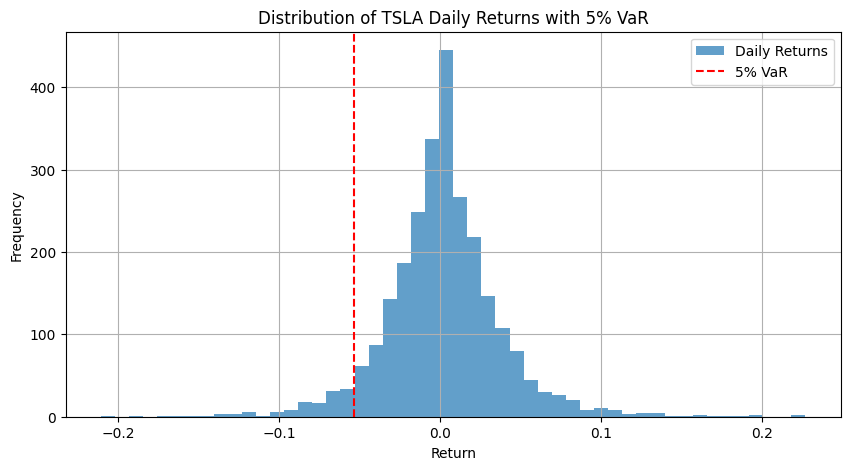

In [ ]:
import numpy as np

def calculate_var(returns, confidence_level=0.05):
    return np.percentile(returns.dropna(), 100 * confidence_level)

def calculate_sharpe_ratio(returns, risk_free_rate=0.0, periods_per_year=252):
    excess_returns = returns - risk_free_rate / periods_per_year
    return np.sqrt(periods_per_year) * excess_returns.mean() / excess_returns.std()

var_5 = calculate_var(processed_df['ret'])
sharpe = calculate_sharpe_ratio(processed_df['ret'])

print(f"Historical 5% VaR: {var_5:.4f}")
print(f"Historical Sharpe Ratio: {sharpe:.4f}")

# Plot returns histogram with VaR line
plt.figure(figsize=(10, 5))
plt.hist(processed_df['ret'].dropna(), bins=50, alpha=0.7, label='Daily Returns')
plt.axvline(var_5, color='r', linestyle='--', label='5% VaR')
plt.title('Distribution of TSLA Daily Returns with 5% VaR')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Optional: Seasonality and Trend Observations - Decompose time series

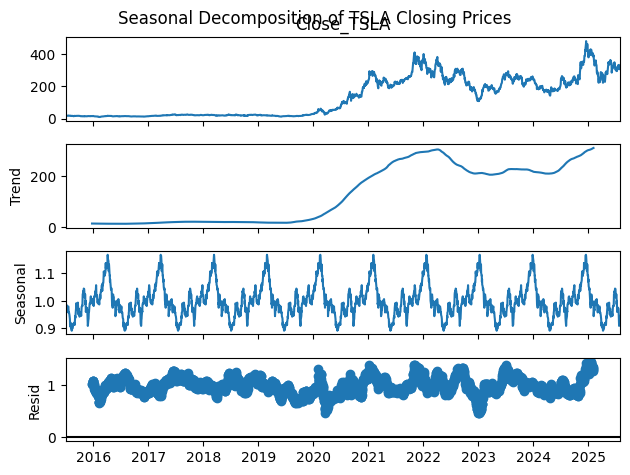

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(processed_df['Close_TSLA'], model='multiplicative', period=252)  # approx. trading days in a year
result.plot()
plt.suptitle('Seasonal Decomposition of TSLA Closing Prices')
plt.show()


### Seasonality and Trend Insights

- The seasonal decomposition reveals clear yearly seasonality patterns and a long-term upward trend in Tesla's closing prices.
- The residuals appear to be relatively stable, indicating the model's multiplicative decomposition fits well.

### Optional: Outlier detection - days with unusually high or low returns (e.g. outside 3 std dev)

In [ ]:

ret_mean = processed_df['ret'].mean()
ret_std = processed_df['ret'].std()
outliers = processed_df[(processed_df['ret'] > ret_mean + 3*ret_std) | (processed_df['ret'] < ret_mean - 3*ret_std)]

print(f"Number of outlier days: {len(outliers)}")
display(outliers[['ret', 'log_ret']])


Number of outlier days: 44


,ret,log_ret
Date,,
2015-11-04,0.111735,0.105922
2018-08-02,0.161880,0.150039
2018-09-28,-0.139015,-0.149679
2018-10-01,0.173471,0.159966
2018-10-23,0.127189,0.119727
2019-01-18,-0.129711,-0.138930
2019-07-25,-0.136137,-0.146341
2019-10-24,0.176692,0.162707
2020-02-03,0.198949,0.181445


### Implications for Modeling

- TSLA closing prices are non-stationary (as seen in ADF test results), so differencing or transformation is necessary for ARIMA modeling.
- Daily returns are stationary, suitable for modeling and risk analysis.
- Understanding volatility and risk metrics like VaR is crucial for portfolio optimization and risk management.